In [ ]:
import os 
dir_primary = 'F:/UrbanDataProject/land_surface_temperature/code/analysis'
# os.chdir('/home/tml/research/land_surface_temperature/code/analysis')
os.chdir(dir_primary)
from analysis import *
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import glob
code_dir = os.getcwd()
os.chdir('../..')


# Import data

In [2]:
cities = ['bal', 'por', 'det', 'phx']
# import data
grid_size = 500
df = import_data(grid_size)

# Variable importance

In [3]:
# only run if you need to recalculate the partial dependence
# calculate_partial_dependence(df, grid_size)

lst_day_mean


f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\pyearth\earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\pyearth\earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


lst_night_mean


f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\pyearth\earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\pyearth\earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


lst_night_max


f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\pyearth\earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\pyearth\earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


lst_day_max


f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\pyearth\earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\pyearth\earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


In [3]:
# import results
results_pd = pd.read_csv('data/regression/results_partial_dependence_{}.csv'.format(grid_size))

In [5]:
results_pd.head()

,Unnamed: 0,boot,dependent,independent,mean,model,x
0,0,0.0,lst_day_mean,ndvi_mean,2.190060,gbrt,-1.560618
1,1,0.0,lst_day_mean,ndvi_mean,1.096924,rf,-1.560618
2,2,0.0,lst_day_mean,ndvi_mean,4.722166,mars,-1.560618
3,3,0.0,lst_day_mean,ndvi_mean,4.897753,gam,-1.560618
4,4,0.0,lst_day_mean,ndvi_mean,5.623038,mlr,-1.560618


In [6]:
# calculate the swing
# calc_swing(results_pd, grid_size)

In [4]:
# import swing results
results_swing = pd.read_csv('data/regression/results_swing_{}.csv'.format(grid_size))

f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


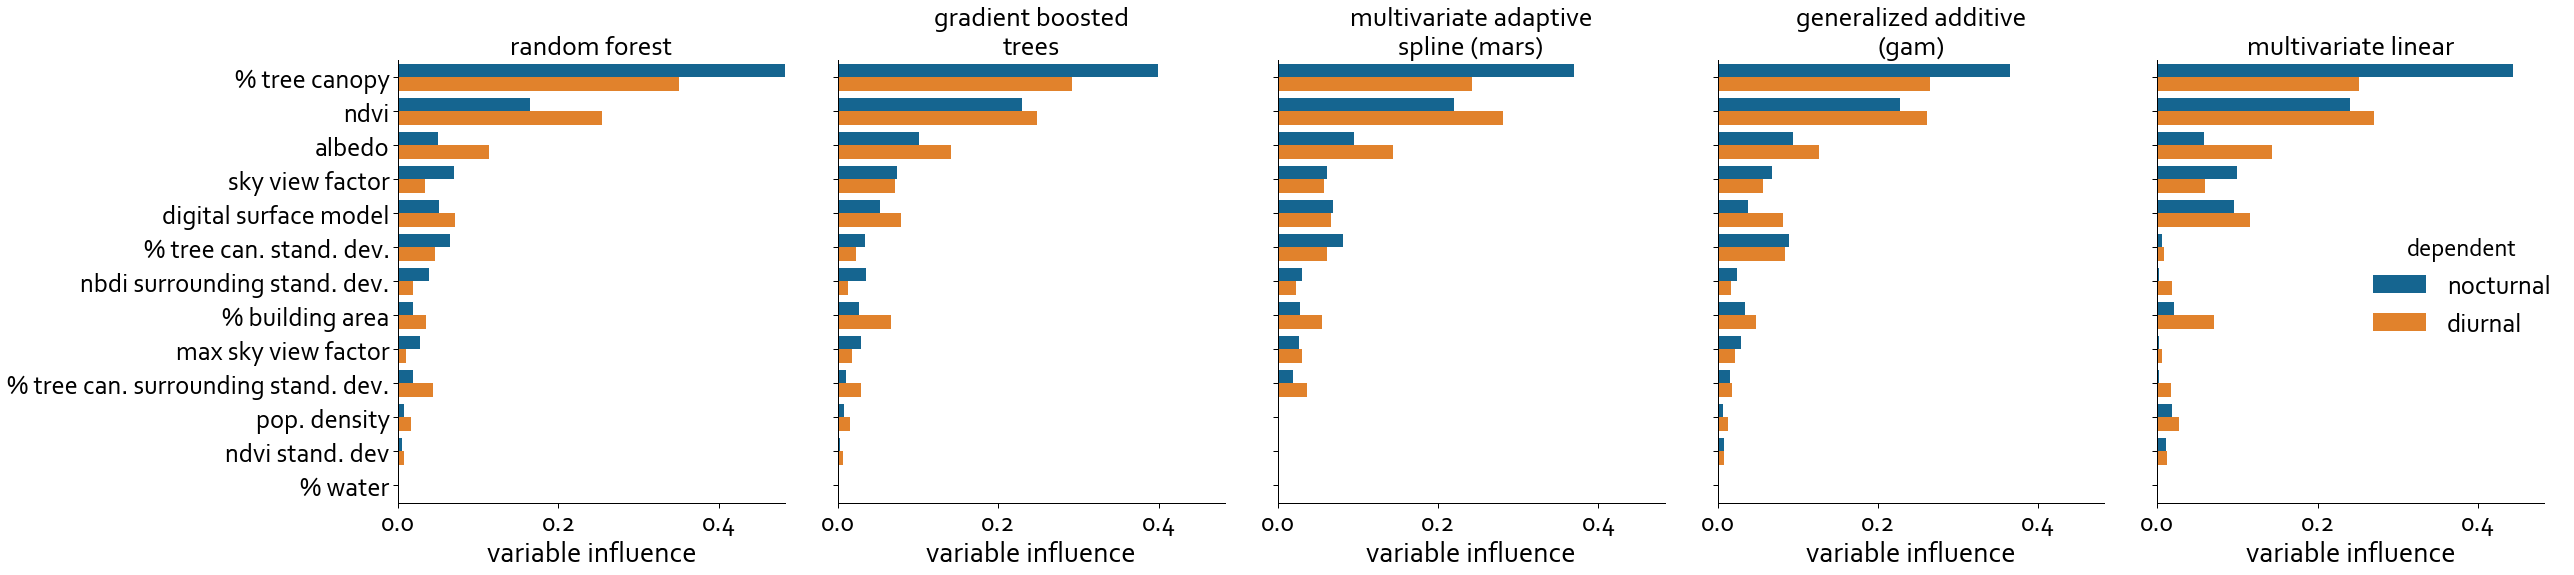

['% tree canopy',
 'ndvi',
 'albedo',
 'sky view factor',
 'digital surface model',
 '% tree can. stand. dev.',
 'nbdi surrounding stand. dev.',
 '% building area',
 'max sky view factor',
 '% tree can. surrounding stand. dev.',
 'pop. density',
 'ndvi stand. dev',
 '% water']

<Figure size 432x288 with 0 Axes>

In [8]:
# plot
plot_importance(results_swing, grid_size)

In [5]:
# import the error metrics
path = 'data/regression/holdout_{}'.format(grid_size)                     # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f) for f in all_files)
loss = pd.concat(df_from_each_file, ignore_index=True)

loss = loss.dropna()
loss_mean = loss.groupby(['error_metric','time_of_day','model']).mean()

loss_mean = loss_mean.reset_index()
loss_mean = loss_mean.replace({'diurnal':'lst_day_mean','diurnalmax':'lst_day_max','nocturnal':'lst_night_mean','nocturnalmax':'lst_night_max', 'gbrf':'gbrt'})
r2_mean = loss_mean.loc[loss_mean.error_metric == 'r2',['time_of_day','model','error']]

In [6]:
# match the mean error to the swing results
swing = pd.merge(left=results_swing, right=r2_mean, how='left', left_on=['dependent','model'], right_on=['time_of_day','model'])

f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


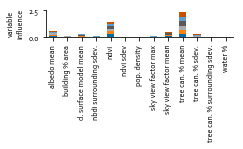

<Figure size 246.614x152.416 with 0 Axes>

f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


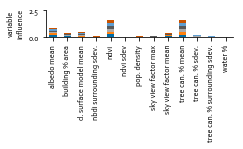

<Figure size 246.614x152.416 with 0 Axes>

f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


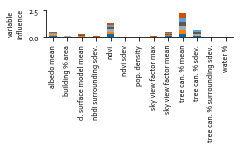

<Figure size 246.614x152.416 with 0 Axes>

f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


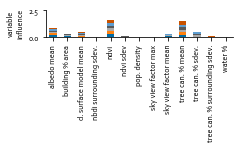

['tree can. % mean',
 'ndvi',
 'albedo mean',
 'sky view factor mean',
 'd. surface model mean',
 'tree can. % sdev.',
 'building % area',
 'nbdi surrounding sdev.',
 'sky view factor max',
 'tree can. % surrounding sdev.',
 'pop. density',
 'ndvi sdev',
 'water %']

<Figure size 246.614x152.416 with 0 Axes>

In [7]:
plot_importance_stacked(swing, grid_size)

In [31]:
swing.head()

,Unnamed: 0,Unnamed: 0.1,dependent,independent,model,raw,swing,time_of_day,error
0,0,0.0,lst_day_max,alb_mean,gam,5.240932,0.114370,lst_day_max,0.714931
1,1,1.0,lst_day_max,bldg,gam,3.030938,0.066143,lst_day_max,0.714931
2,2,2.0,lst_day_max,dsm_mean,gam,3.338267,0.072849,lst_day_max,0.714931
3,3,3.0,lst_day_max,dsm_sd,gam,1.766859,0.038557,lst_day_max,0.714931
4,4,4.0,lst_day_max,lcov_11,gam,5.199665,0.113470,lst_day_max,0.714931


f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


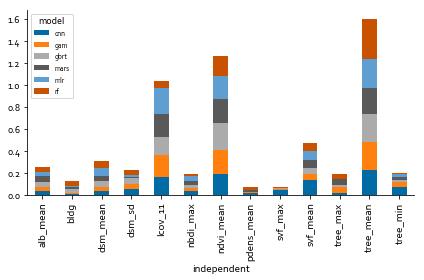

In [46]:
wing = swing.loc[swing.dependent=='lst_night_mean',['independent','swing','model']]
wing.head()
wing = wing.pivot(index= 'independent', columns = 'model', values='swing')
wing.plot(stacked=True, kind='bar')
plt.show()

f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


AttributeError: Unknown property stacked

f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


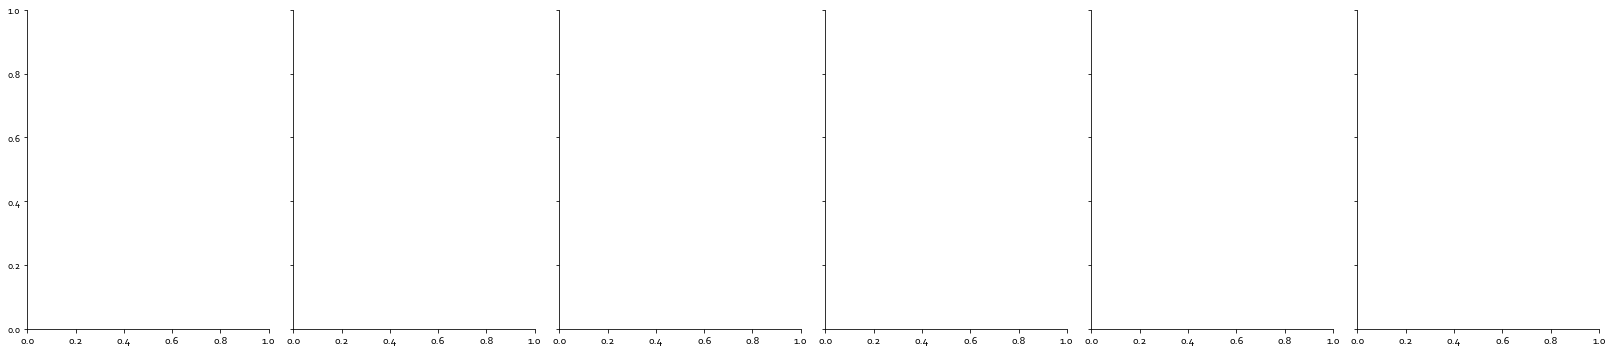

In [51]:
sns.factorplot(y='swing', x='independent', hue='dependent',
                            data=swing, kind='bar', col='model',
#                             order = feature_order,
                            hue_order=['lst_night_mean','lst_day_mean'],
#                             height = height_2c*2,
                            aspect = 0.75,
                            stacked=True
                                         
                            # col_wrap = 3
                            )

In [47]:
wing

model,cnn,gam,gbrt,mars,mlr,rf
independent,,,,,,
alb_mean,0.036020,0.029427,0.047756,0.060239,0.035423,0.043528
bldg,0.005196,0.013001,0.036994,0.018706,0.002946,0.049877
dsm_mean,0.031329,0.037668,0.054017,0.048303,0.071724,0.065099
dsm_sd,0.051260,0.044749,0.055264,0.013658,0.012294,0.048293
lcov_11,0.162520,0.194980,0.171341,0.207133,0.233995,0.068651
nbdi_max,0.030443,0.029857,0.031939,0.036481,0.042427,0.015251
ndvi_mean,0.187090,0.223915,0.238626,0.219971,0.206832,0.183707
pdens_mean,0.012111,0.008182,0.003694,0.014532,0.008508,0.021322
svf_max,0.043984,0.003385,0.009565,0.000000,0.001737,0.013398


In [30]:
swing.swing * swing.error

0      0.081767
1      0.047287
2      0.052082
3      0.027566
4      0.081123
5      0.050611
6      0.107342
7      0.014316
8      0.010705
9      0.044512
10     0.040541
11     0.027305
12     0.129774
13     0.062553
14     0.043642
15     0.081198
16     0.027931
17     0.062496
18     0.070156
19     0.094335
20     0.023045
21     0.028686
22     0.037146
23     0.027307
24     0.026036
25     0.157697
26     0.090769
27     0.054344
28     0.048844
29     0.033383
         ...   
282    0.032286
283    0.048763
284    0.003814
285    0.137333
286    0.026614
287    0.011718
288    0.015338
289    0.010286
290    0.054461
291    0.017251
292    0.016304
293    0.004273
294    0.021105
295    0.066869
296    0.021886
297    0.009329
298    0.061612
299    0.008671
300    0.022165
301    0.023161
302    0.084422
303    0.013694
304    0.062331
305    0.041922
306    0.076616
307    0.030158
308    0.007950
309    0.056058
310    0.044691
311    0.073781
Length: 312, dtype: floa

f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


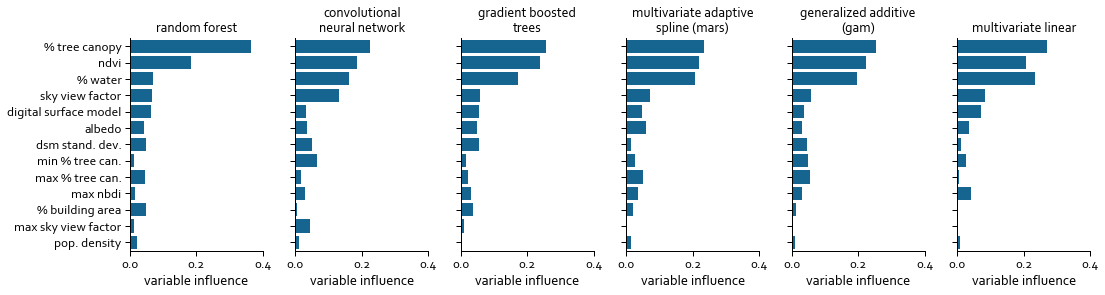

<Figure size 432x288 with 0 Axes>

f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


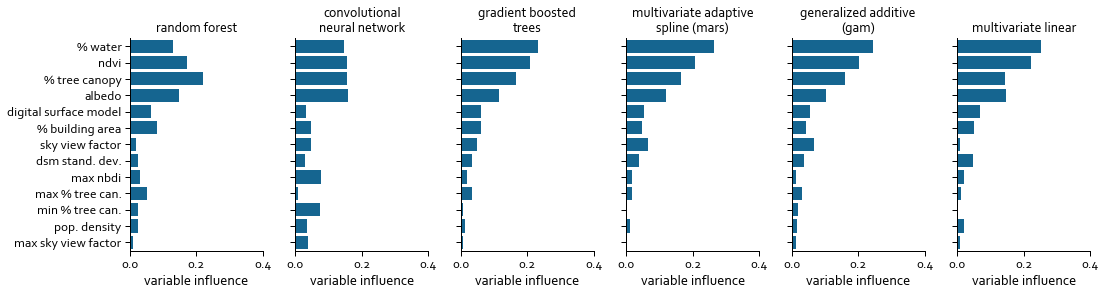

<Figure size 432x288 with 0 Axes>

f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


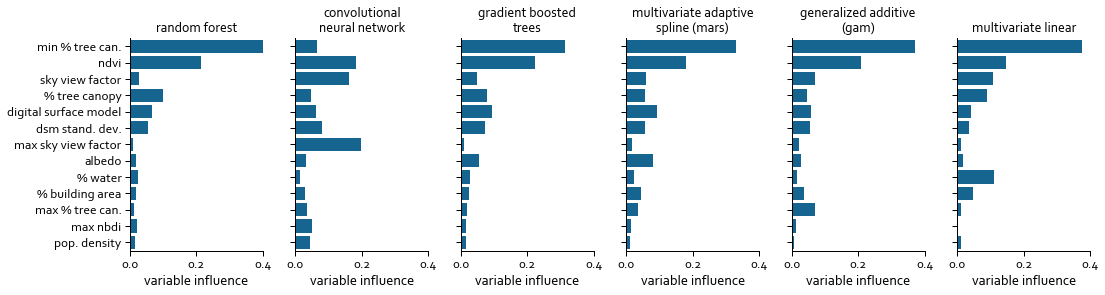

<Figure size 432x288 with 0 Axes>

f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


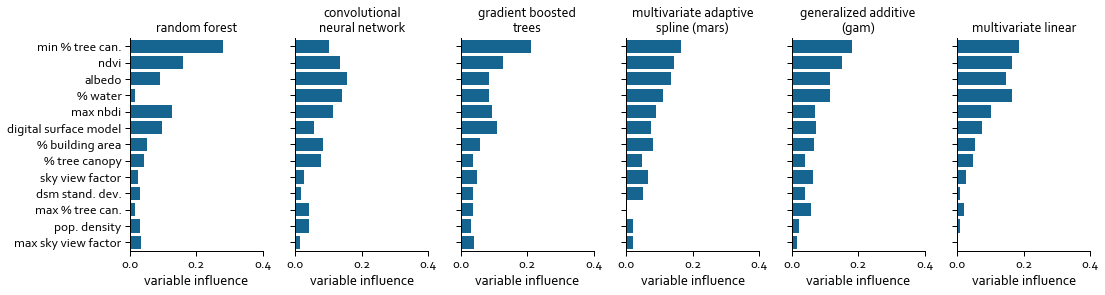

['min % tree can.',
 'ndvi',
 'albedo',
 '% water',
 'max nbdi',
 'digital surface model',
 '% building area',
 '% tree canopy',
 'sky view factor',
 'dsm stand. dev.',
 'max % tree can.',
 'pop. density',
 'max sky view factor']

<Figure size 432x288 with 0 Axes>

In [7]:
plot_importance_max(results_swing, grid_size)

In [24]:
results_swing.model.value_counts()

gbrt    52
rf      52
gam     52
mlr     52
mars    52
cnn     44
Name: model, dtype: int64